<a href="https://colab.research.google.com/github/charookc5/AIML_internship/blob/main/AIML_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


Load dataset:

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

print("Feature names:", data.feature_names[:5])  # just to check
print("Target names:", data.target_names)


Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']
Target names: ['malignant' 'benign']


Train/Test Split & Scaling

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


Train SVM with Linear Kernel

In [4]:
svm_linear = SVC(kernel="linear", C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))


Linear SVM Accuracy: 0.956140350877193


Train SVM with RBF Kernel (Non-linear)

In [5]:
svm_rbf = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))


RBF SVM Accuracy: 0.9736842105263158


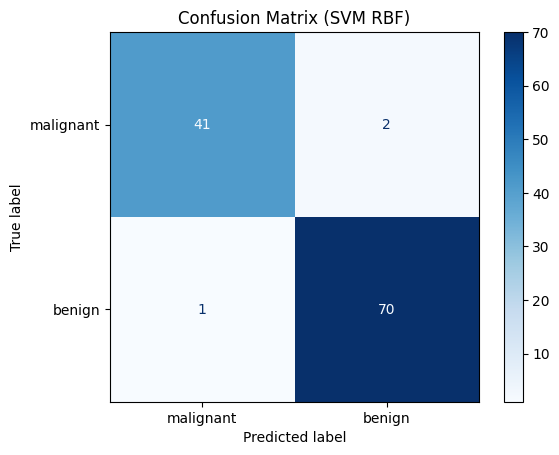

In [6]:
cm = confusion_matrix(y_test, y_pred_rbf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (SVM RBF)")
plt.show()


Visualize Decision Boundaries (on 2 Features)


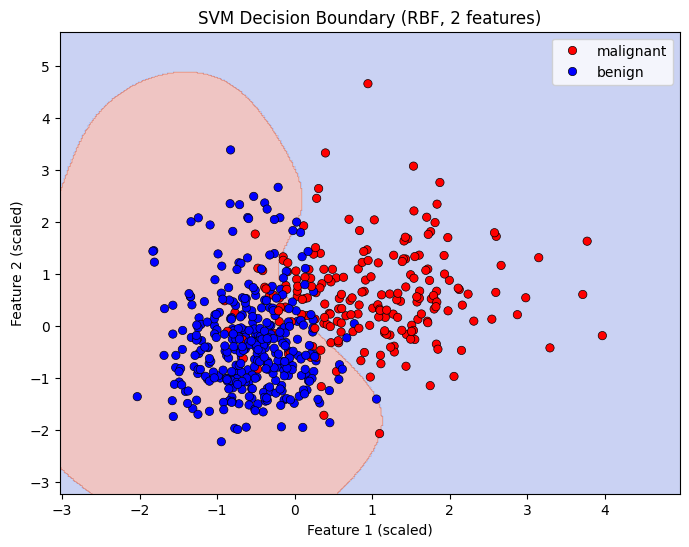

In [7]:
X_vis = X_scaled[:, :2]  # take only first 2 features
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.2, random_state=42
)

svm_vis = SVC(kernel="rbf", C=1.0, gamma=0.5)
svm_vis.fit(X_train_vis, y_train_vis)

# Meshgrid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1], hue=data.target_names[y],
                palette=["red","blue"], edgecolor="k")
plt.title("SVM Decision Boundary (RBF, 2 features)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()


Hyperparameter Tuning (C & Gamma)

In [8]:
param_grid = {
    "C": [0.1, 1, 10],
    "gamma": [0.01, 0.1, 1],
    "kernel": ["rbf"]
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV Accuracy: 0.9736263736263737


Cross-Validation

In [9]:
svm_cv = SVC(kernel="rbf", C=grid.best_params_["C"], gamma=grid.best_params_["gamma"])
scores = cross_val_score(svm_cv, X_scaled, y, cv=5)

print("Cross-validation accuracy:", scores.mean())


Cross-validation accuracy: 0.9789318428815401
